### base64
https://stackoverflow.com/questions/22351254/python-script-to-convert-image-into-byte-array/22351973

In [1]:
import base64
import os

from PIL import Image
from netCDF4 import Dataset
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('/mnt/sdb1/wscho/Jobs/gk2aICT/')
from src.tools.clip import (
    GK2AFDProcessor
)
from netCDF4 import Dataset

In [66]:
base_path= '/mnt/sda1/research/data/tmp_gk2a/fd'
target_datetime = '202111190340'

In [67]:
fd_type2file = {
    'red': 'gk2a_ami_le1b_vi006_fd005ge_{target_datetime}.nc', # vi006
    'veg': 'gk2a_ami_le1b_vi008_fd010ge_{target_datetime}.nc', # vi008
    'co2': 'gk2a_ami_le1b_ir133_fd020ge_{target_datetime}.nc', # ir133
    'cld': 'gk2a_ami_le2_cld_fd020ge_{target_datetime}.nc', # cloud
    'swrad': 'gk2a_ami_le2_swrad_fd020ge_{target_datetime}.nc', # radiance
}

In [68]:
# fd_type2file = {
#     'amv': 'gk2a_ami_le2_amv-wv063-cd_fdzzzll_{target_datetime}.nc', # motion vector
# }

In [96]:
# file_name = fd_type2file['veg'].format(target_datetime=target_datetime)
# file_name = fd_type2file['co2'].format(target_datetime=target_datetime)
file_name = fd_type2file['red'].format(target_datetime=target_datetime)
ds = Dataset(os.path.join(base_path, file_name))
arr = np.array(ds['image_pixel_values'][:])

In [97]:
# gk2a_proc = GK2AProcessor(resolution=1.00)
gk2a_proc = GK2AFDProcessor(gk2a_filename=file_name)

In [98]:
midpoint = [int(i/2) for i in arr.shape]
print(midpoint)

[11000, 11000]


In [99]:
latlon_from_rowcol = gk2a_proc.latlon_from_rowcol(*[int(i/2) for i in arr.shape])
print(latlon_from_rowcol)

(0.0022654549519487673, 128.19774971087216)


In [100]:
gk2a_proc.rowcol_from_latlon(*latlon_from_rowcol)

(11000.000000002867, 11000.000000002963)

In [101]:
gk2a_proc.rowcol_from_latlon(*(43.07, 124.0))

(2785.7406353404094, 10349.686240047266)

In [105]:
clip_range = {
    'ullatitude': 48.0,
    'ullongitude': 122.0,
    'lrlatitude': 31.0,
    'lrlongitude': 130.0,
}

In [106]:
arr_clip = gk2a_proc.cut_with_latlon(arr, **clip_range)

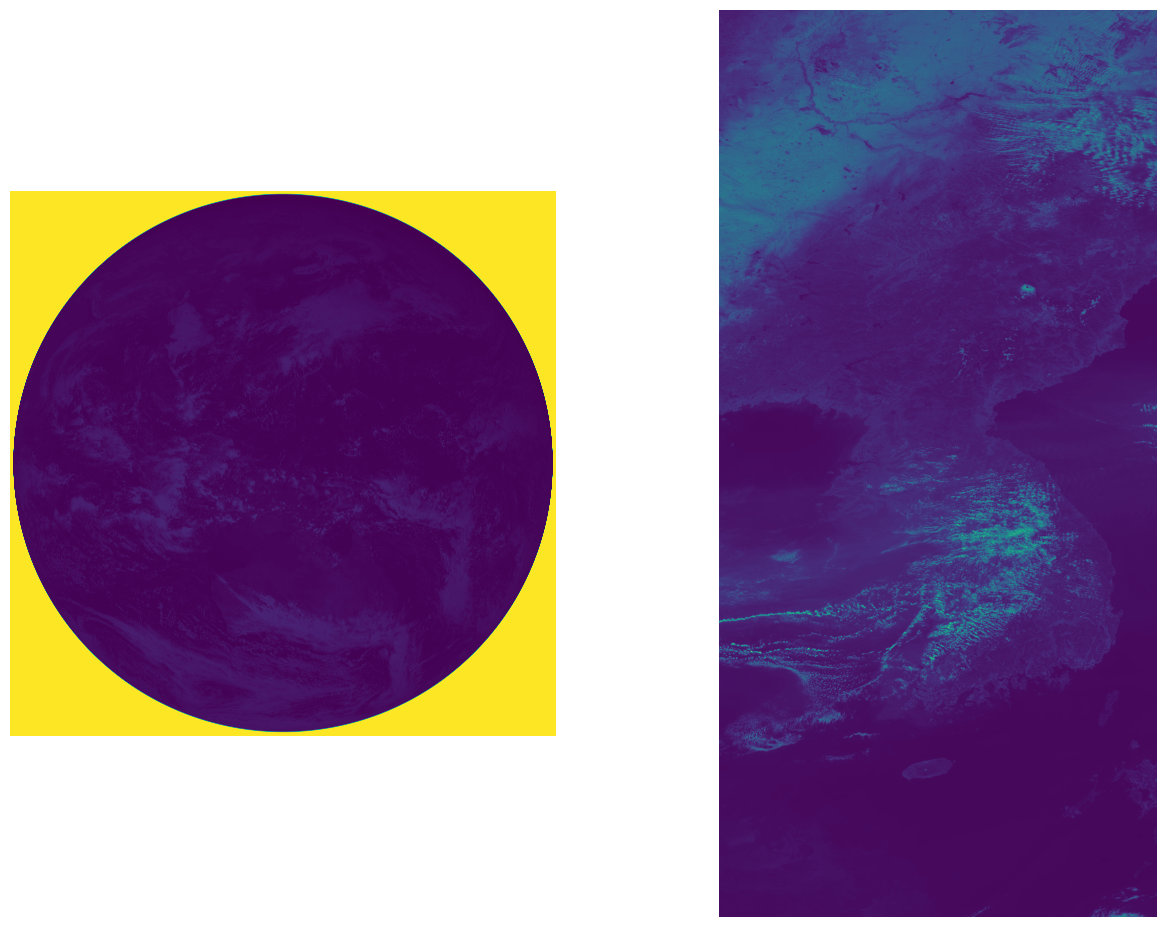

In [107]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(arr)
ax[0].axis('off')
ax[1].imshow(arr_clip)
ax[1].axis('off')
fig.subplots_adjust(right=2, top=2)

## save

In [19]:
s = base64.b64encode(flow.reshape(-1))
ss = s.decode('utf-8')

In [20]:
data = {'data': ss}

In [21]:
with open('data.json', 'w') as f:
    json.dump(data, f)

## read

In [22]:
with open('data.json', 'r') as f:
    data = json.load(f)

## restore

In [23]:
restored = np.frombuffer(    
    base64.decodebytes(data['data'].encode('utf-8')), dtype='float32'
).reshape(1000, 800, 2)

In [24]:
np.abs(flow - restored).max()

0.0